<a href="https://colab.research.google.com/github/naenumtou/statisticalModel/blob/main/bayesian_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install PyMC3 library
!pip install arviz==0.6.1
!pip install pymc3==3.8

In [ ]:
#Import library
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pymc3 as pm
%config InlineBackend.figure_format = 'retina'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Time series data')

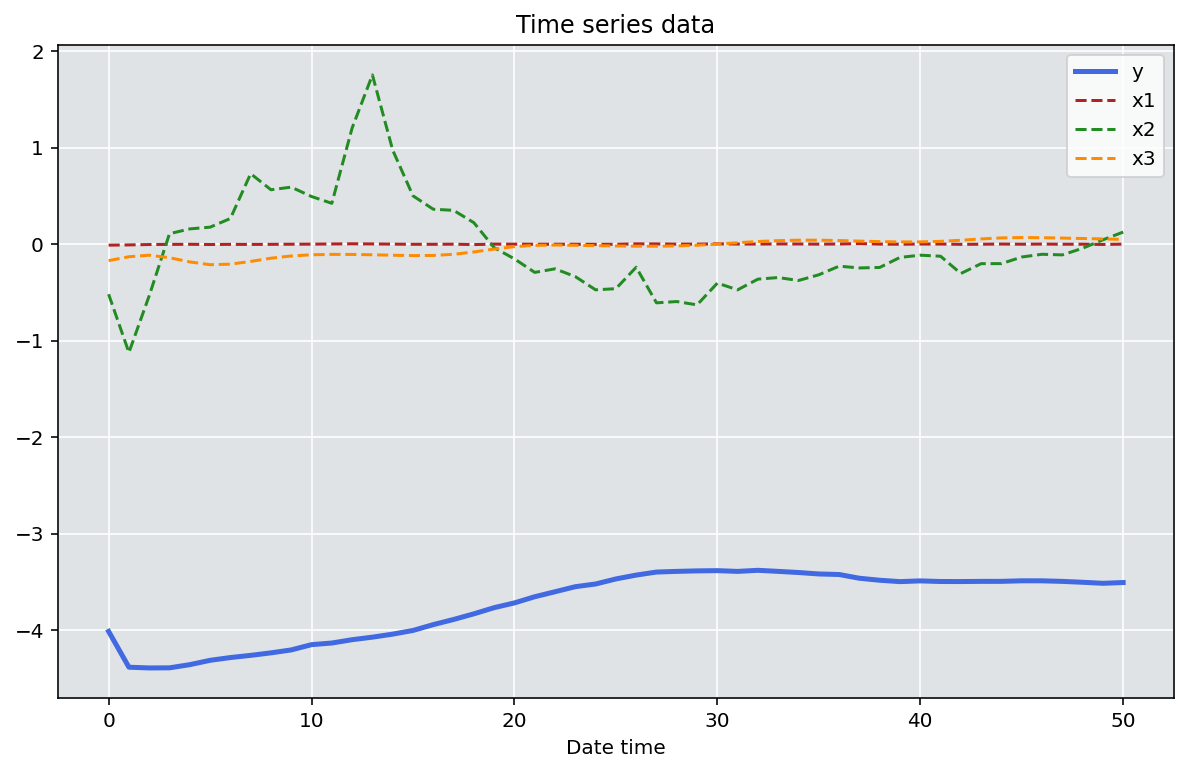

In [ ]:
#Data import
df = pd.read_csv('https://raw.githubusercontent.com/naenumtou/statisticalModel/main/datasets/Bayesian_model.csv')

plt.figure(figsize = (10,6))
ax = plt.axes()
ax.set_facecolor('#dfe3e6')
plt.grid(color = 'w')
plt.plot(df['y'], c = 'royalblue', linewidth = 2.5, label = 'y')
plt.plot(df['x1'], c = 'firebrick', linestyle = '--', label = 'x1')
plt.plot(df['x2'], c = 'forestgreen', linestyle = '--', label = 'x2')
plt.plot(df['x3'], c = 'darkorange', linestyle = '--', label = 'x3')
plt.xlabel('Date time')
plt.legend()
plt.title('Time series data')

R_Square: 0.8616087471847003
MSE: 0.018211503105028705
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     97.54
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           3.39e-20
Time:                        14:08:39   Log-Likelihood:                 31.862
No. Observations:                  51   AIC:                            -55.72
Df Residuals:                      47   BIC:                            -48.00
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

Text(0.5, 1.0, 'Back-testing (linear)')

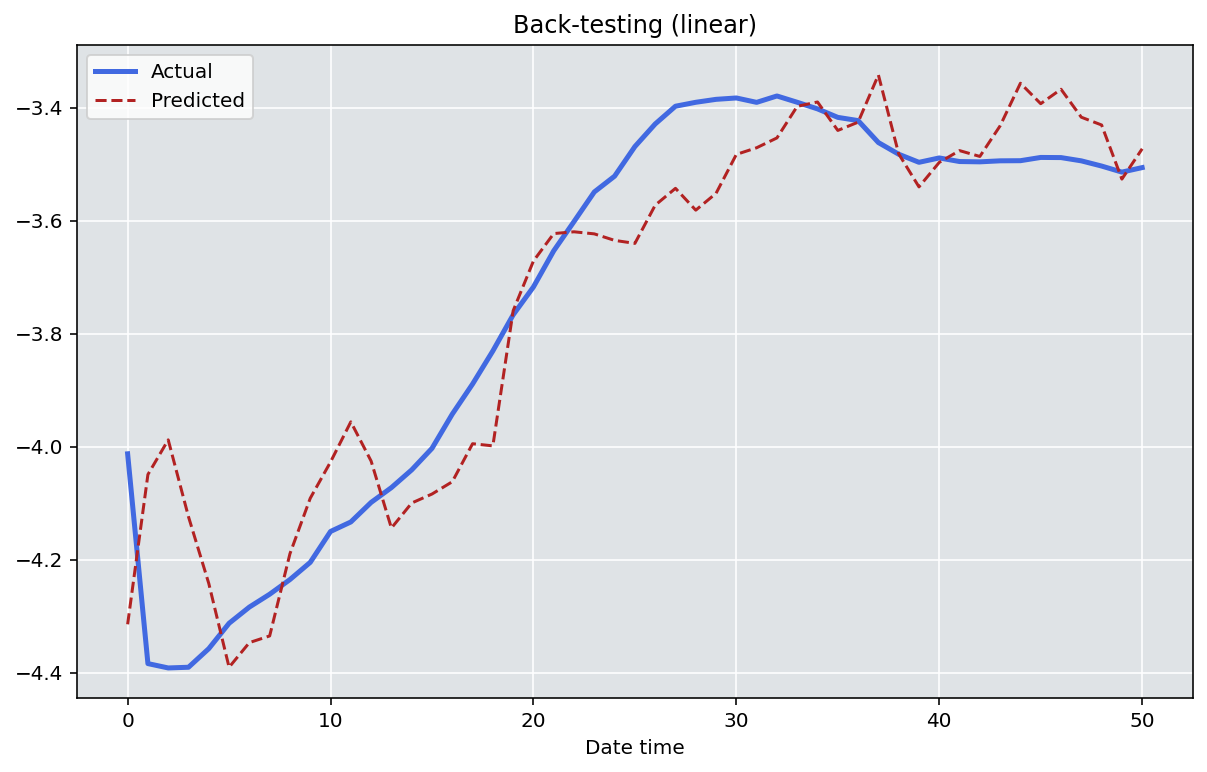

In [ ]:
#Simple linear regression
model = sm.OLS(df['y'], sm.add_constant(df[['x1', 'x2', 'x3']]))
results = model.fit()
print('R_Square:', format(results.rsquared))
print('MSE:', format(results.mse_resid))
print(results.summary())

plt.figure(figsize = (10,6))
ax = plt.axes()
ax.set_facecolor('#dfe3e6')
plt.grid(color = 'w')
plt.plot(df['y'], c = 'royalblue', linewidth = 2.5, label = 'Actual')
plt.plot(results.fittedvalues, c = 'firebrick', linestyle = '--', label = 'Predicted')
plt.xlabel('Date time')
plt.legend()
plt.title('Back-testing (linear)')

In [ ]:
#Bayesian linear regression
with pm.Model() as normal_model:
  family = pm.glm.families.Normal()
  pm.GLM.from_formula('y ~ x1 + x2 + x3', data = df, family = family)
  model_bayesian = pm.sample(draws = 2000, chains = 2, tune = 500, cores = 4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, x3, x2, x1, Intercept]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [00:09<00:00, 550.13draws/s]


/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not 

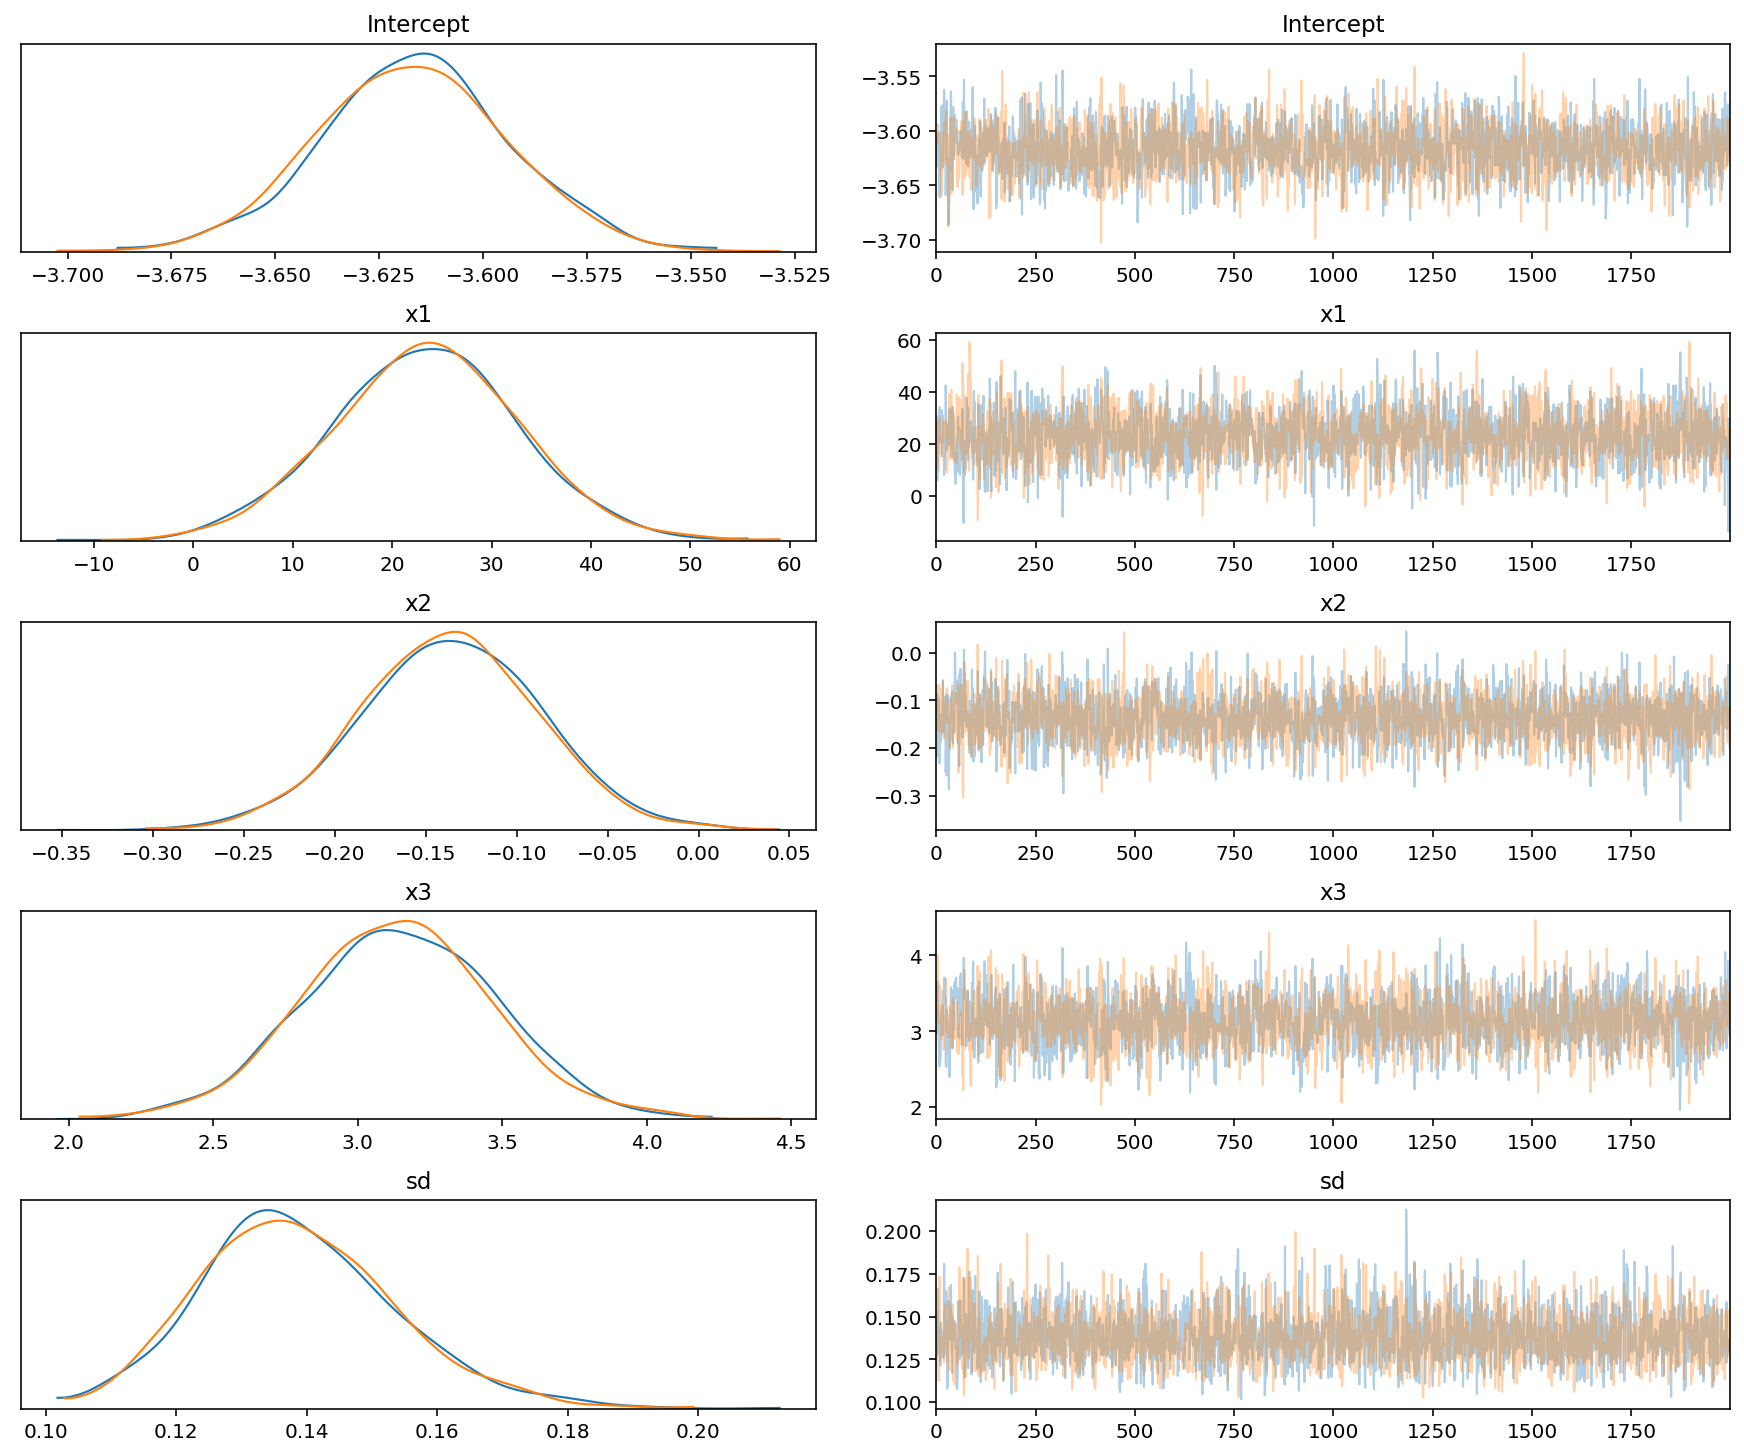

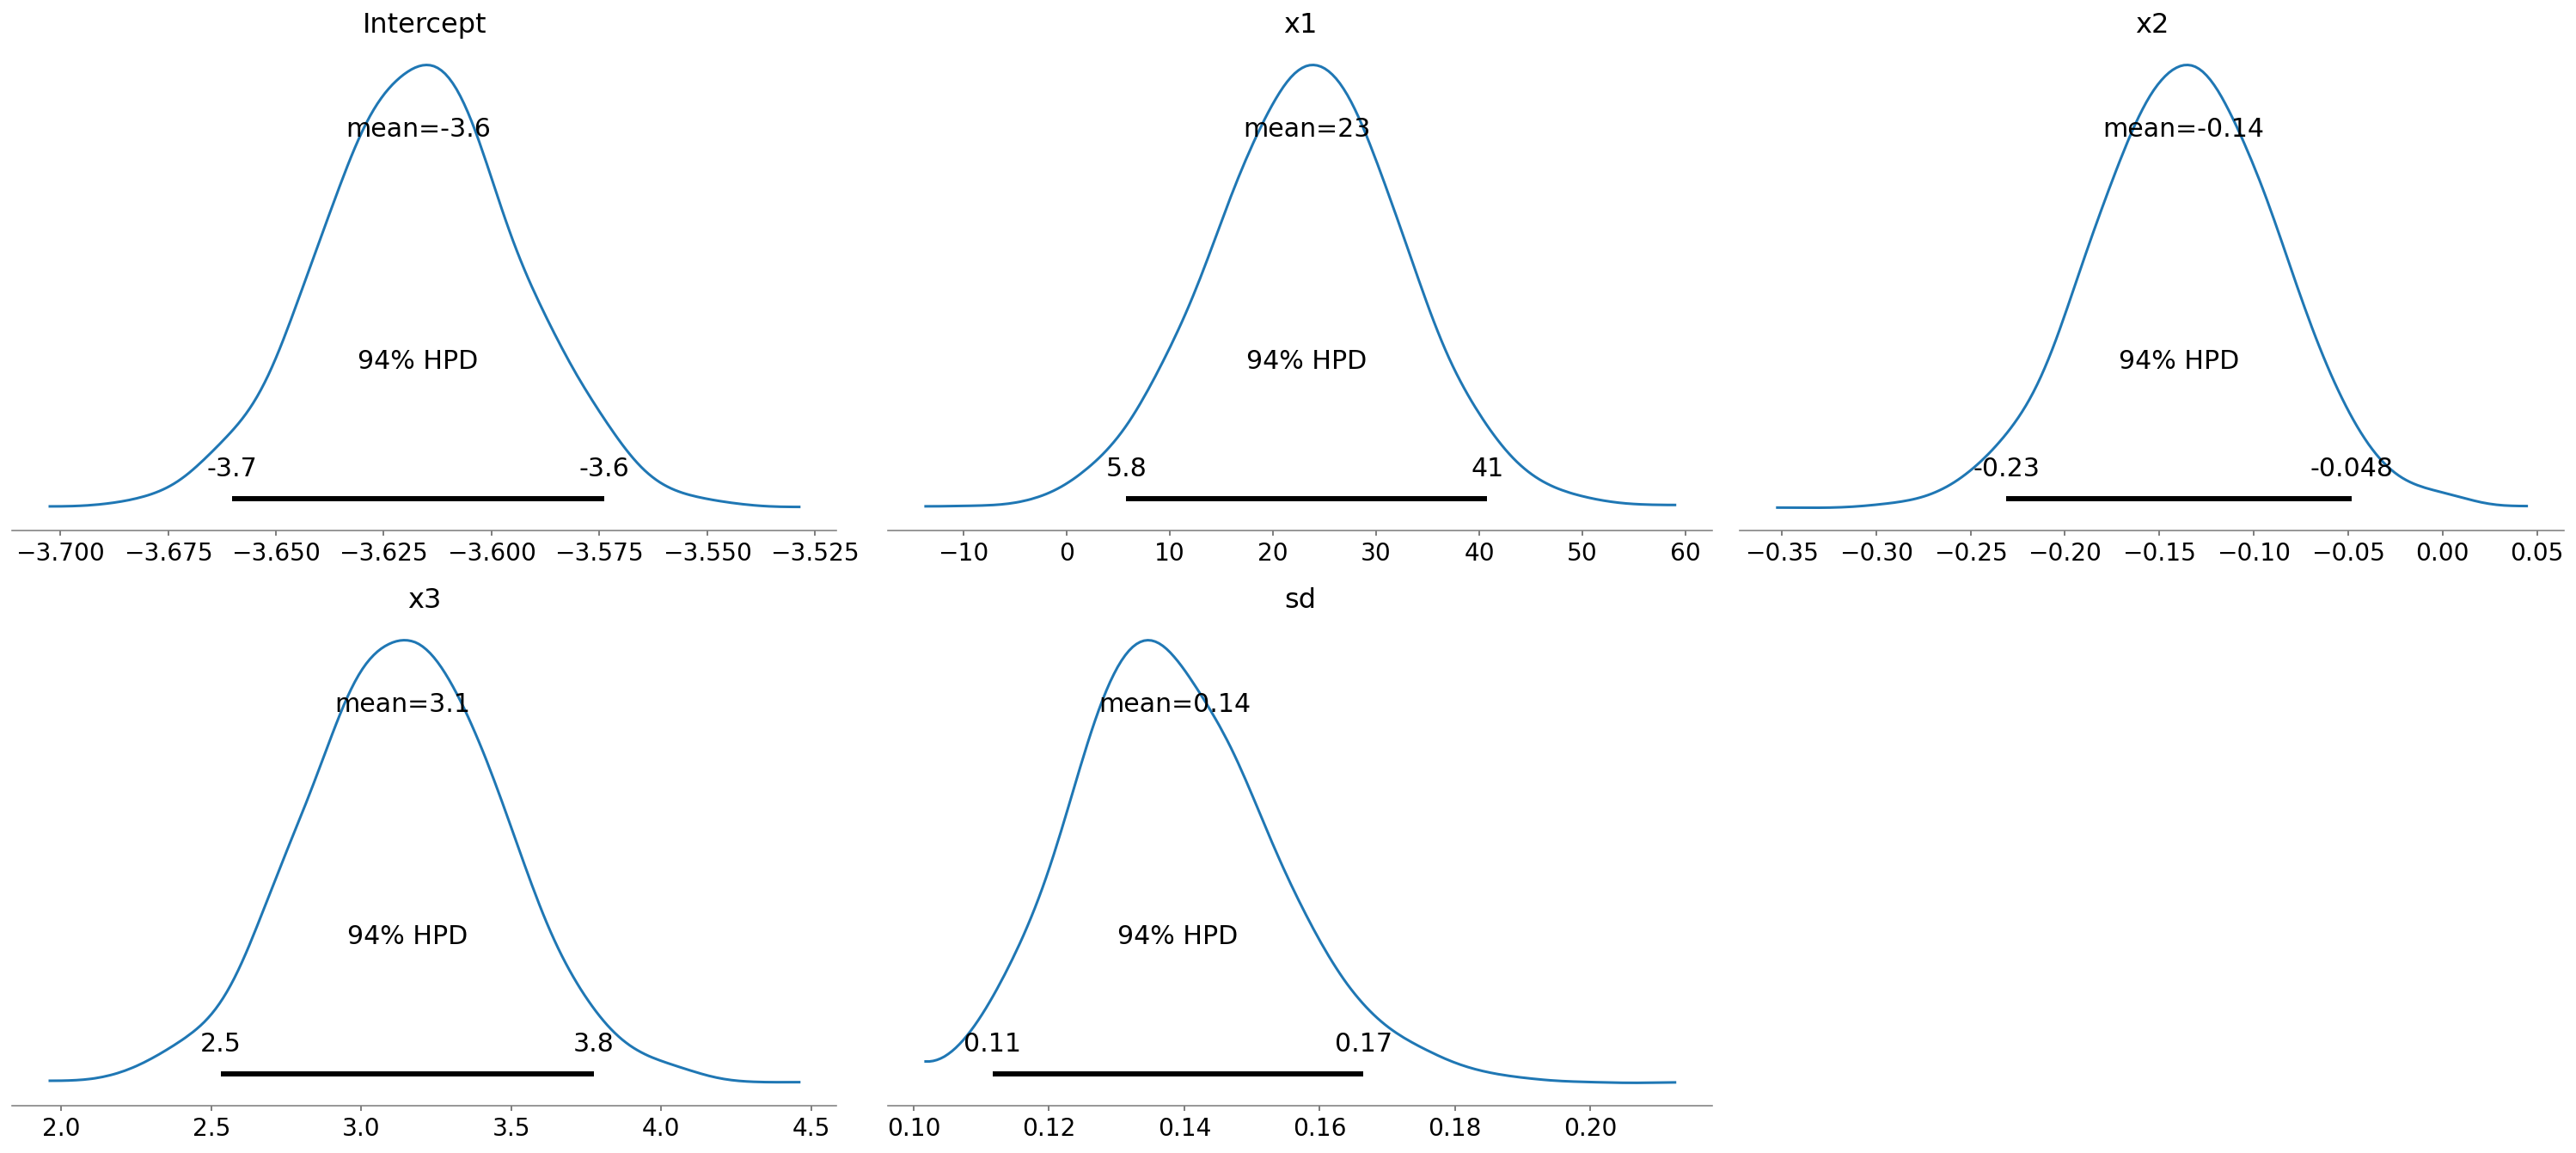

In [ ]:
#Plot and summary
pm.traceplot(model_bayesian);
pm.plot_posterior(model_bayesian);
results_bayesian = pm.summary(model_bayesian)

In [ ]:
#Simulate the prediction for 100 sample in normal distribution
ppc = pm.sample_posterior_predictive(model_bayesian, model = normal_model, samples = 100)

/usr/local/lib/python3.6/dist-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 100/100 [00:00<00:00, 115.23it/s]


Text(0.5, 1.0, 'Bayesian simulation')

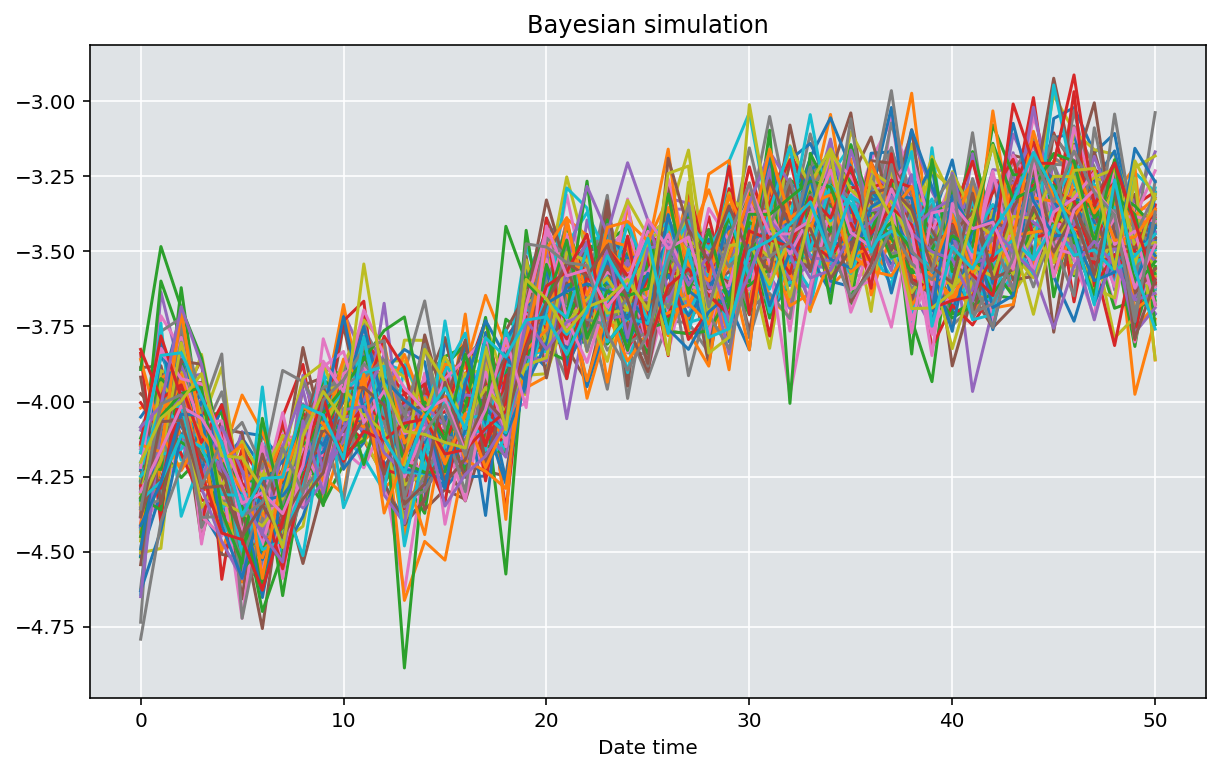

In [ ]:
#Plot Bayesian simulation
plt.figure(figsize = (10,6))
ax = plt.axes()
ax.set_facecolor('#dfe3e6')
plt.grid(color = 'w')
plt.plot(ppc['y'].T)
plt.xlabel('Date time')
plt.title('Bayesian simulation')

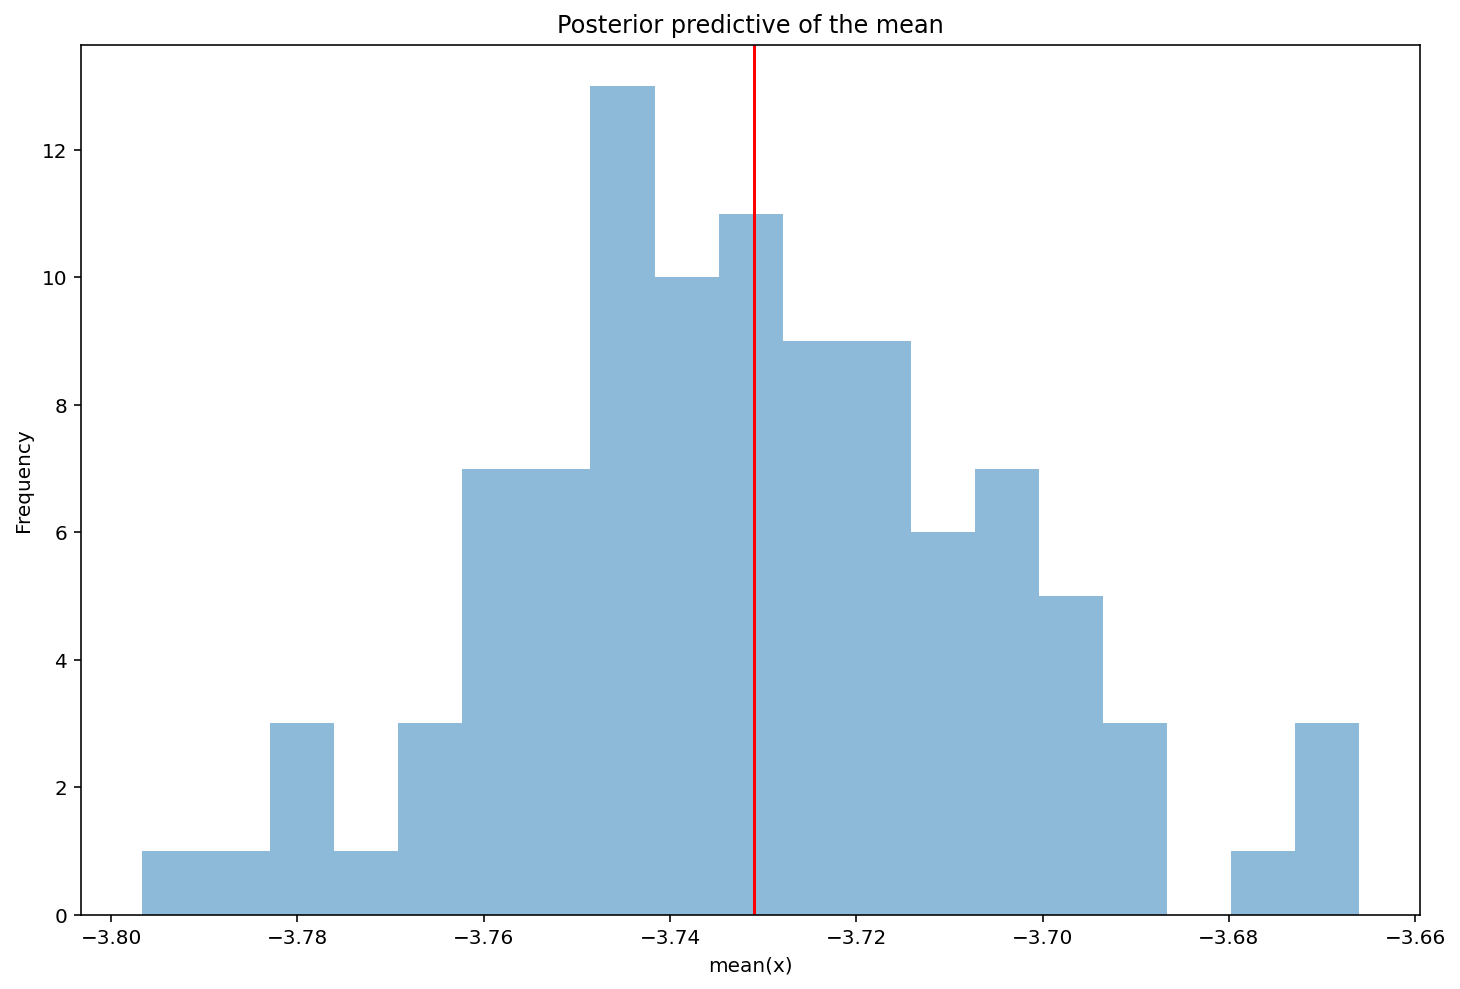

In [ ]:
#Normal distribution
_, ax = plt.subplots(figsize = (12, 8))
ax.hist([n.mean() for n in ppc['y']], bins = 19, alpha = 0.5)
ax.axvline(ppc['y'].mean(), color = 'red')
ax.set(title='Posterior predictive of the mean', xlabel = 'mean(x)', ylabel = 'Frequency');

Text(0.5, 1.0, 'Back-testing (bayesian)')

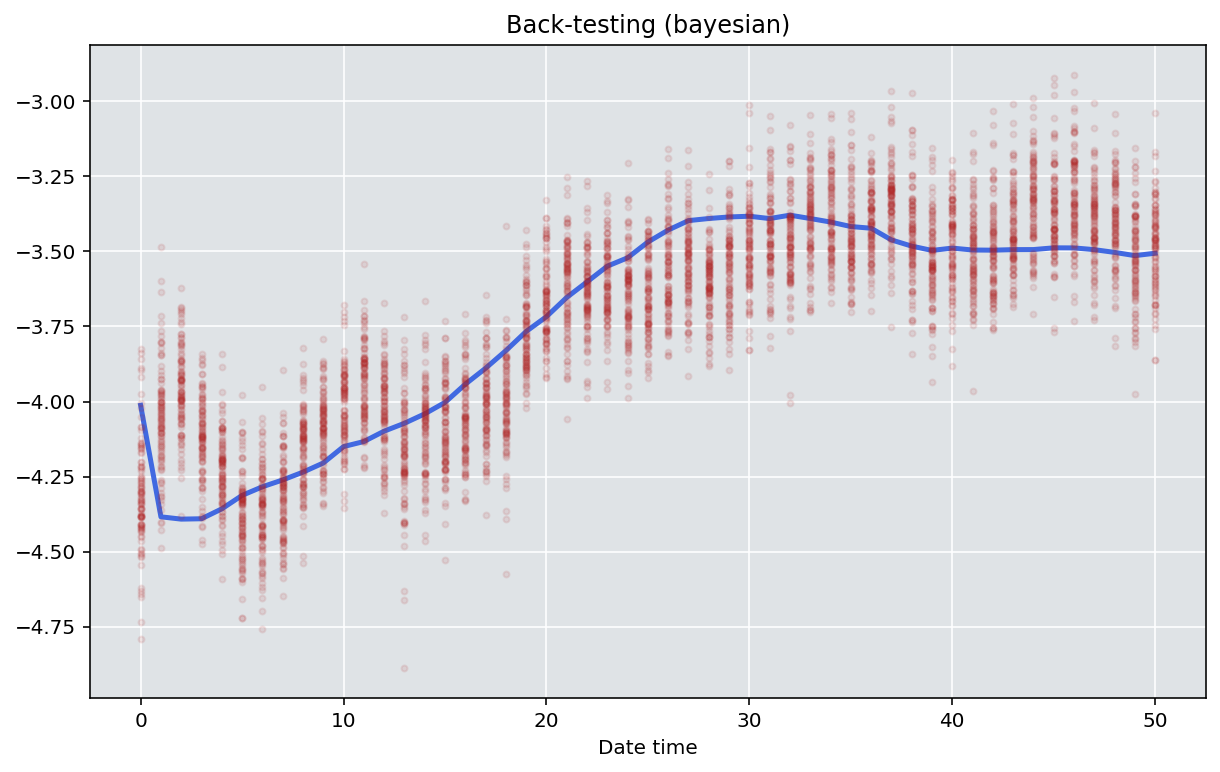

In [ ]:
#Plot back-testing
plt.figure(figsize = (10,6))
ax = plt.axes()
ax.set_facecolor('#dfe3e6')
plt.grid(color = 'w')
plt.plot(df['y'], '-', c = 'royalblue', linewidth = 2.5, label = 'Actual')
plt.plot(ppc['y'].T, '.b', alpha = 0.1, c = 'firebrick', label = 'Predicted')
plt.xlabel('Date time')
plt.title('Back-testing (bayesian)')

Text(0.5, 1.0, 'Compare Bayesian and simple linear model')

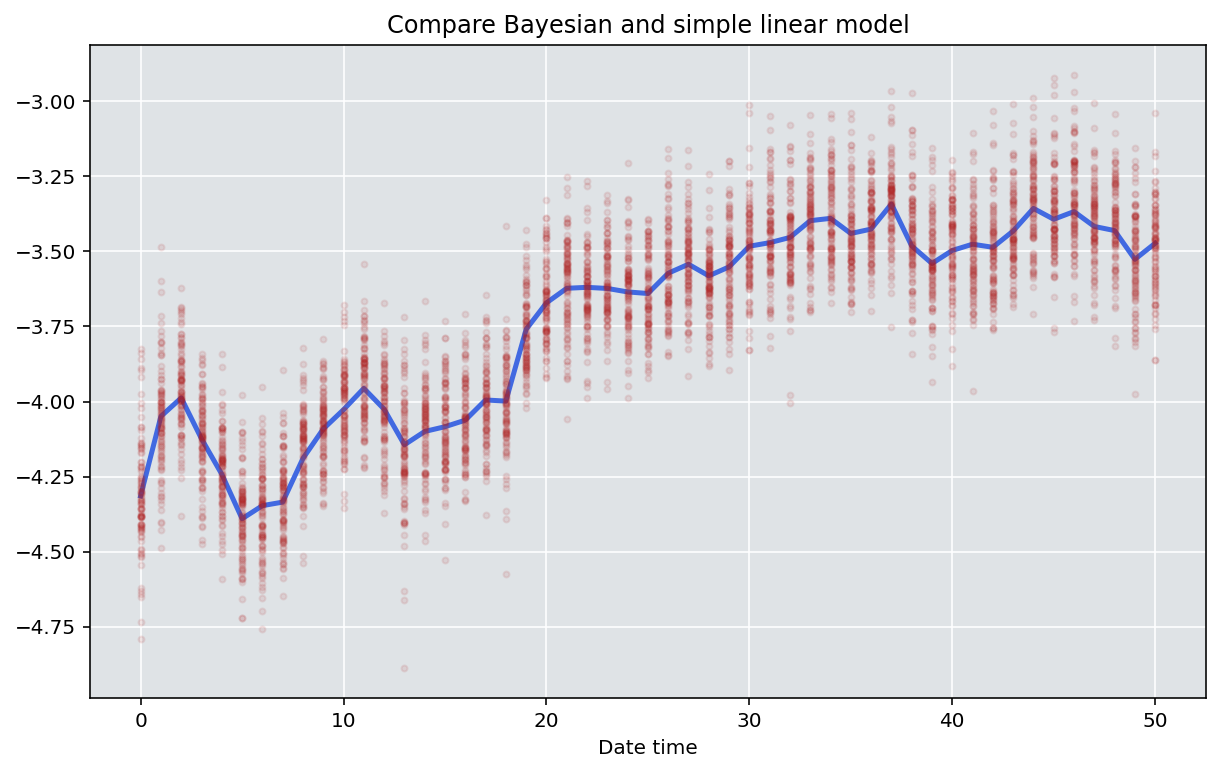

In [ ]:
#Compare to linear regression
plt.figure(figsize = (10,6))
ax = plt.axes()
ax.set_facecolor('#dfe3e6')
plt.grid(color = 'w')
plt.plot(results.fittedvalues, '-', c = 'royalblue', linewidth = 2.5, label = 'Linear model')
plt.plot(ppc['y'].T, '.b', alpha = 0.1, c = 'firebrick', label = 'Predicted')
plt.xlabel('Date time')
plt.title('Compare Bayesian and simple linear model')